In [4]:
import returns as rt
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from stockstats import StockDataFrame as sdf

In [5]:
tickers = ['NRZ','QQQ','SPY','MSFT','AMZN','MDB']
date_from = datetime.datetime.now() - datetime.timedelta(6 * 30)
df = None

for i in tickers:
    df_t = rt.returns(i,'Daily')
 
    # indexed performance
    df_t = df_t[df_t.index >= date_from]

    df_t.loc[df_t.index == df_t.index.min(), 'performance'] = 100
    df_t.loc[df_t.index == df_t.index.min(), 'return'] = 0
  
    df_t['performance'] = ((df_t['return'] / 100) + 1).cumprod() * 100
    
    if df is None:
        df = df_t
    else:
        df = pd.concat([df,df_t])

df.set_index(['ticker'],append=True,inplace=True)
        
df

,,horizon,open,high,low,close,volume,dividends,return,vol30_annualized,macd,macds,rsi_12,performance
Date,ticker,,,,,,,,,,,,,
2020-05-06,NRZ,Daily,6.29,6.57,5.88,5.92,11647000,0.0,0.000000,210.578137,-0.315858,-0.643677,50.312482,100.000000
2020-05-07,NRZ,Daily,6.02,6.34,5.93,6.07,9552500,0.0,2.533784,207.578336,-0.265054,-0.567952,51.788339,102.533784
2020-05-08,NRZ,Daily,6.18,6.43,6.11,6.39,8200700,0.0,5.271829,173.573233,-0.196703,-0.493702,54.905557,107.939189
2020-05-11,NRZ,Daily,6.23,6.27,6.06,6.11,8174400,0.0,-4.381847,173.371020,-0.163245,-0.427611,51.713881,103.209459
2020-05-12,NRZ,Daily,6.18,6.25,5.83,5.92,9112400,0.0,-3.109656,168.944750,-0.150329,-0.372155,49.580363,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,MDB,Daily,250.00,250.20,239.52,240.10,712900,0.0,-3.185484,36.994926,5.855615,8.973688,43.493748,140.730321
2020-10-27,MDB,Daily,243.68,248.42,241.54,244.01,497500,0.0,1.628488,37.087330,4.840346,8.147019,47.430370,143.022097
2020-10-28,MDB,Daily,240.77,242.40,234.50,240.04,570400,0.0,-1.626983,35.511524,3.673051,7.252226,44.032529,140.695153


# Return Indexed to 100

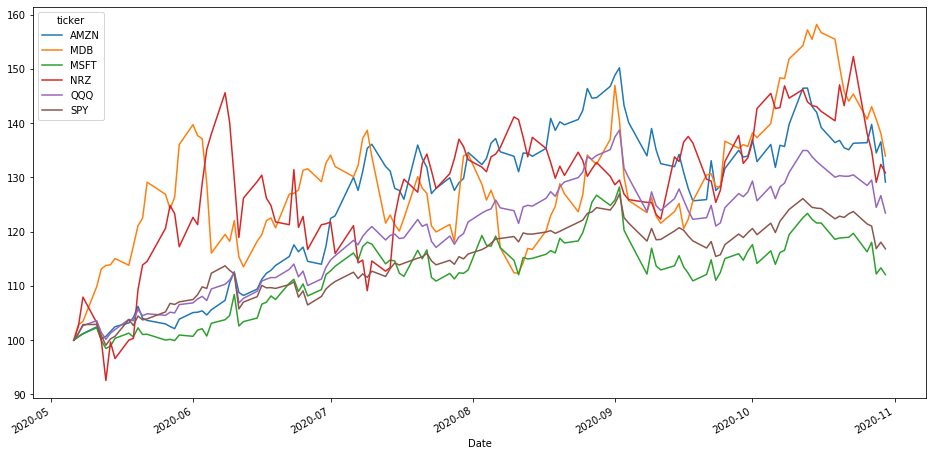

In [6]:
df_p = df.pivot_table(index='Date',columns='ticker',values='performance')

df_p.plot(sharey=True,figsize=(16,8));

# Volatility (30 day window)

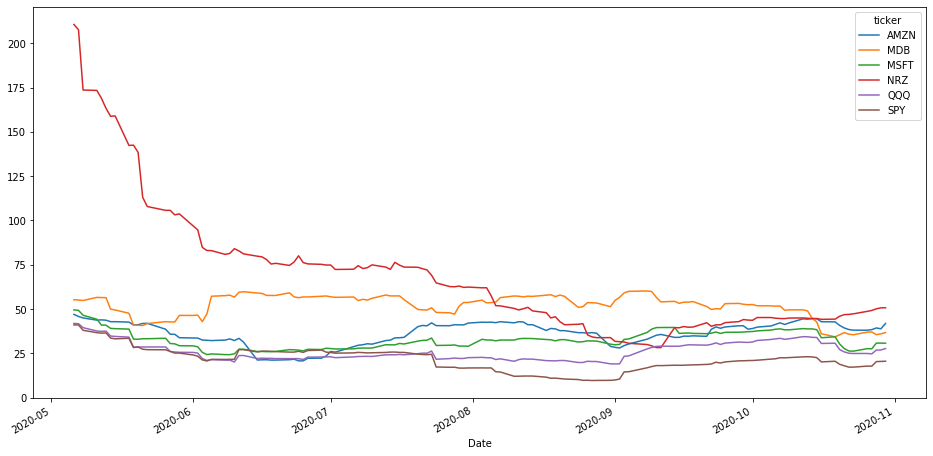

In [7]:
df_p = df.pivot_table(index='Date',columns='ticker',values='vol30_annualized')

df_p.plot(sharey=True,figsize=(16,8));

# RSI (3 Month History)

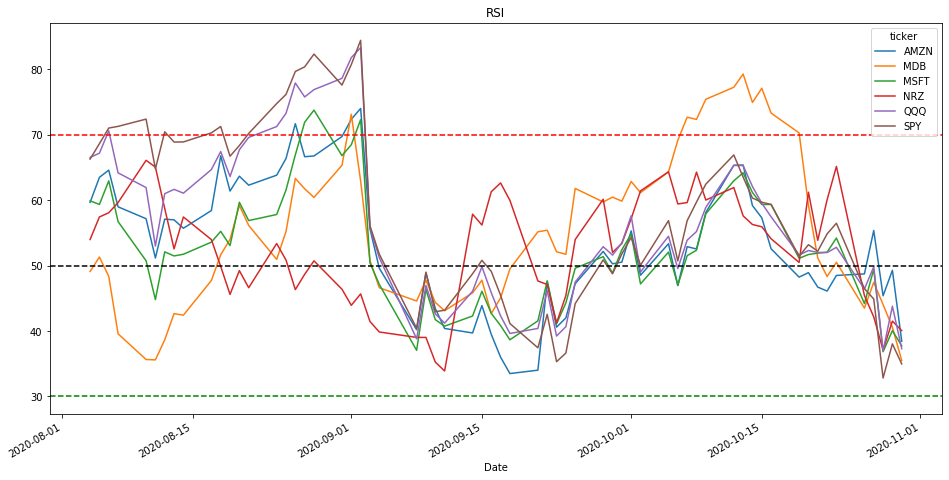

In [8]:
date_from_rsi = datetime.datetime.now() - datetime.timedelta(3 * 30)

df_r = df.reset_index()
df_r = df_r[df_r.Date >= date_from_rsi]

df_r = df_r.pivot_table(index='Date',columns='ticker',values='rsi_12')
df_r.plot(sharey=True,figsize=(16,8),title='RSI')

plt.axhline(y=50, xmin=0.0, xmax=1.0, color='k',ls='--')
plt.axhline(y=30, xmin=0.0, xmax=1.0, color='g',ls='--')
plt.axhline(y=70, xmin=0.0, xmax=1.0, color='r',ls='--');

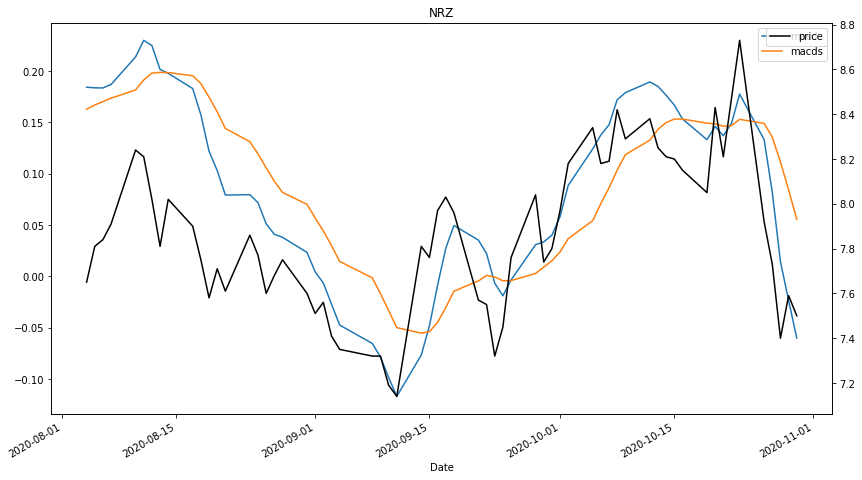

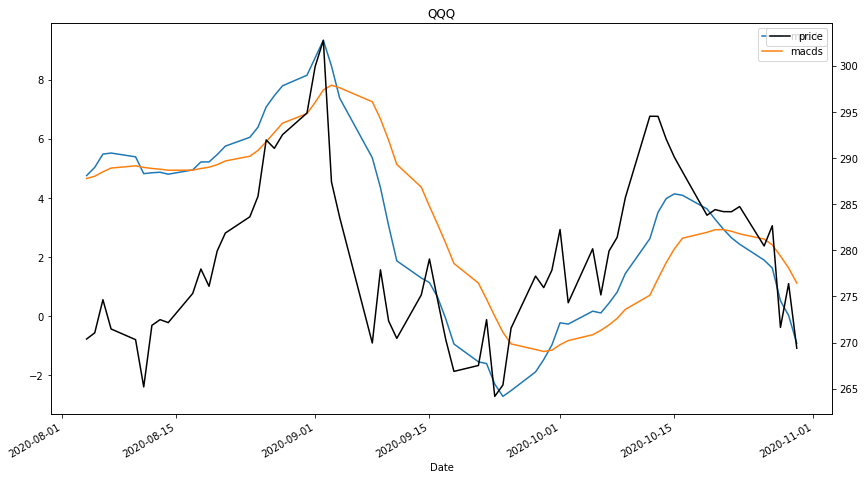

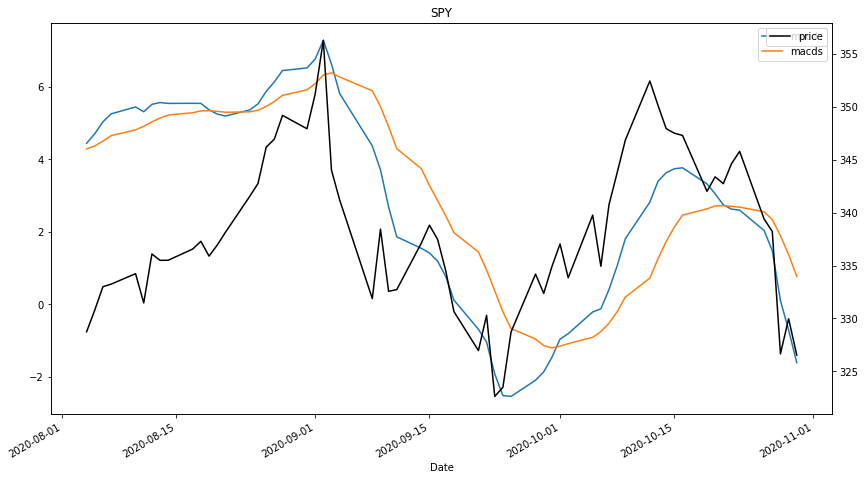

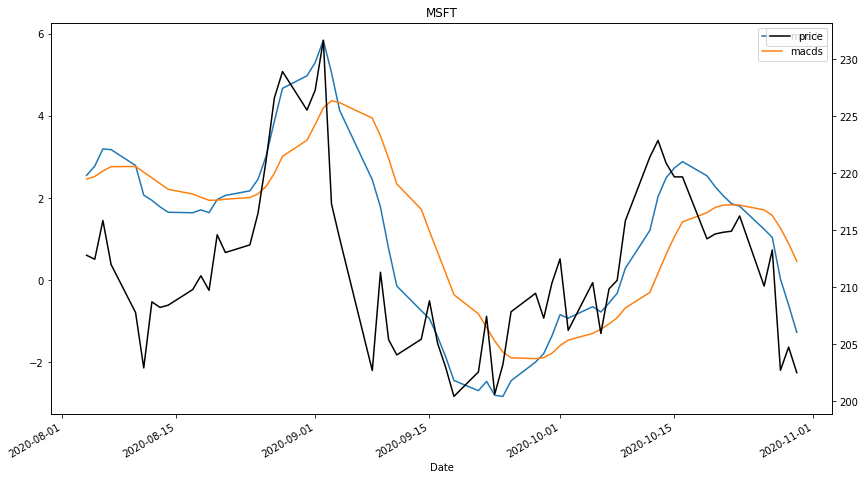

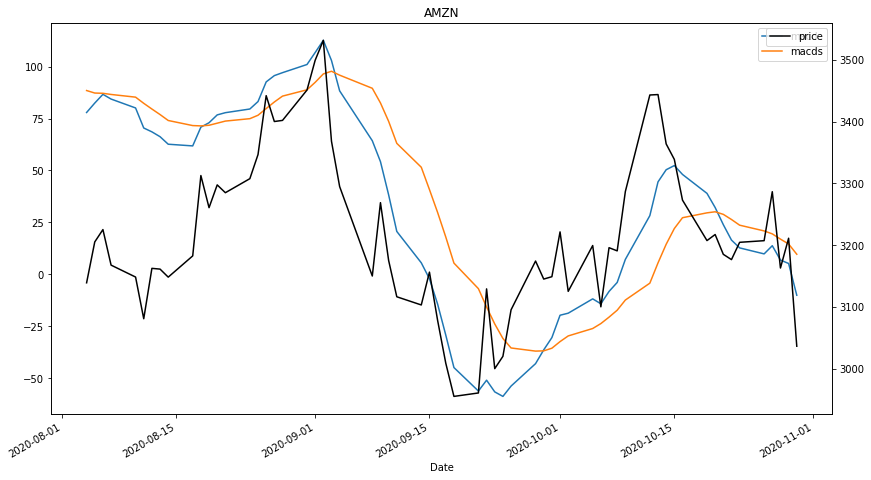

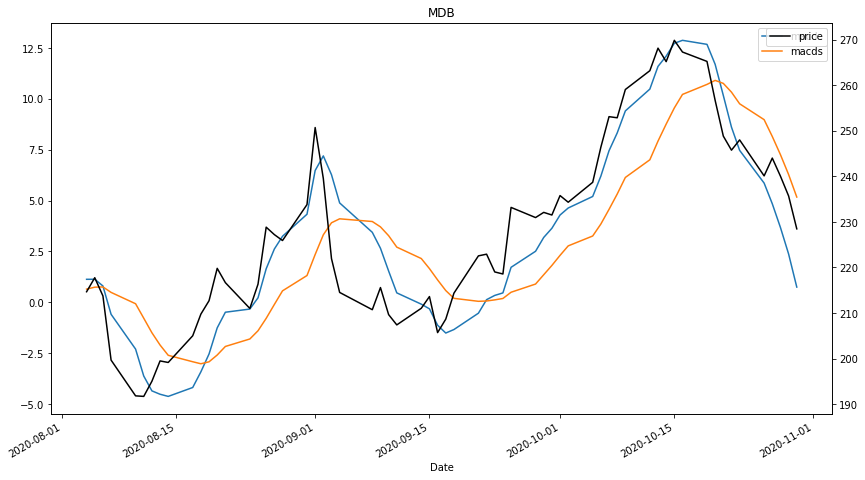

In [9]:
date_from_rsi = datetime.datetime.now() - datetime.timedelta(3 * 30)

df_n = df.reset_index()
count = 0

for ticker in tickers:
    df_nt = df_n[(df_n.Date >= date_from_rsi) & (df_n.ticker == ticker)]
    df_nt = df_nt.pivot_table(index='Date',values=['macd','macds','close'])

    df_nt[['macd', 'macds']].plot(sharex=True,title=ticker,label='macd',figsize=(14,8))
    df_nt['close'].plot(color='black', secondary_y=True, label='price')
    
    plt.legend()
    
    count += 1